In [15]:

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [16]:
env = gym.make(
    "FrozenLake-v1",
    map_name="4x4",
    is_slippery=True
)

In [17]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [18]:
print(n_states,n_actions)


16 4


In [19]:
alpha = 0.5          # learning rate
gamma = 0.95         # discount factor
epsilon = 0.7       # fixed exploration

num_episodes = 1000
max_steps = 100

Q_fixed = np.zeros((n_states, n_actions))


episode_rewards_fixed = []
success_rate_fixed = []
success_count = 0


for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    for step in range(max_steps):
        p = np.random.random()
        if p < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_fixed[state])
    
        next_state, reward, done, truncated, info = env.step(action)
        best_next_action = np.argmax(Q_fixed[next_state])
        Q_fixed[state, action] = Q_fixed[state, action] + alpha * (
            reward + gamma * Q_fixed[next_state, best_next_action] - Q_fixed[state, action]
        )
        state = next_state
        total_reward += reward
        if done or truncated:
            break
    
    episode_rewards_fixed.append(total_reward)

    if reward > 0:
        success_count += 1
    success_rate_fixed.append(success_count / (episode + 1))

print(f"Fixed epsilon final success rate: {success_rate_fixed[-1]*100:.2f}%")

Fixed epsilon final success rate: 2.30%


In [20]:




alpha = 0.5          # learning rate
gamma = 0.95         # discount factor
epsilon = 1.0        # initial exploration
epsilon_min = 0.01   # minimum exploration
epsilon_decay = (epsilon - epsilon_min) / num_episodes  # linear decay

num_episodes = 1000
max_steps = 100


Q_decay = np.zeros((n_states, n_actions))

episode_rewards_decay = []
success_rate_decay = []
success_count = 0


for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    for step in range(max_steps):
        p = np.random.random()
        if p < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_decay[state])
    
        next_state, reward, done, truncated, info = env.step(action)
        best_next_action = np.argmax(Q_decay[next_state])
        Q_decay[state, action] = Q_decay[state, action] + alpha * (
            reward + gamma * Q_decay[next_state, best_next_action] - Q_decay[state, action]
        )
        state = next_state
        total_reward += reward
        if done or truncated:
            break
    
    episode_rewards_decay.append(total_reward)

    if reward > 0:
        success_count += 1
    success_rate_decay.append(success_count / (episode + 1))

    epsilon = max(epsilon_min, epsilon - epsilon_decay)

print(f"Decaying epsilon final success rate: {success_rate_decay[-1]*100:.2f}%")

Decaying epsilon final success rate: 7.00%


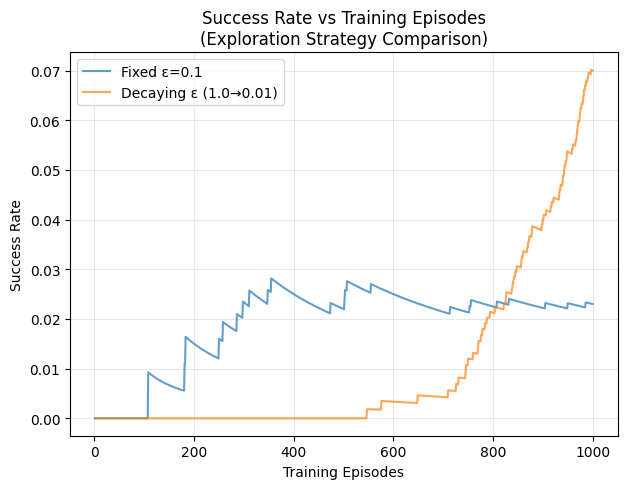

Final Success Rate - Fixed ε: 2.30%
Final Success Rate - Decaying ε: 7.00%


In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
episodes = np.arange(1, len(success_rate_fixed) + 1)
plt.plot(episodes, success_rate_fixed, label='Fixed ε=0.1', alpha=0.7)
plt.plot(episodes, success_rate_decay, label='Decaying ε (1.0→0.01)', alpha=0.7)
plt.xlabel('Training Episodes')
plt.ylabel('Success Rate')
plt.title('Success Rate vs Training Episodes\n(Exploration Strategy Comparison)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Success Rate - Fixed ε: {success_rate_fixed[-1]*100:.2f}%")
print(f"Final Success Rate - Decaying ε: {success_rate_decay[-1]*100:.2f}%")

 α = 0.1...
  Final success rate: 11.70%
 α = 0.5...
  Final success rate: 8.10%
 α = 0.9...
  Final success rate: 4.30%


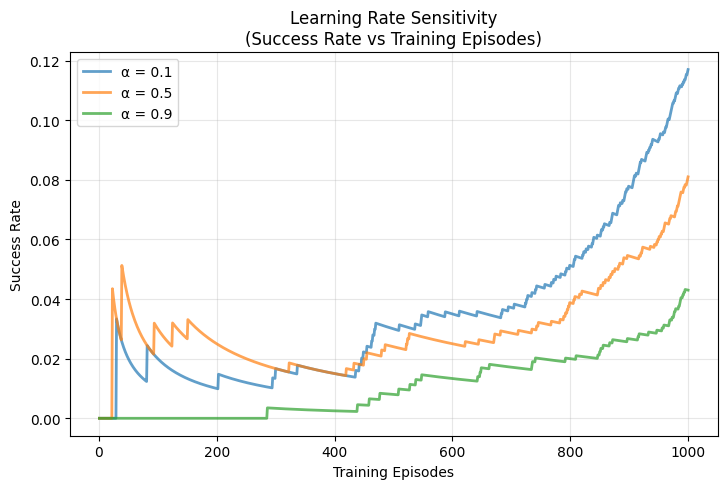


Learning Rate Analysis:
  α = 0.1: Final Rate = 11.70%, Stability (std) = 0.0112
  α = 0.5: Final Rate = 8.10%, Stability (std) = 0.0080
  α = 0.9: Final Rate = 4.30%, Stability (std) = 0.0051


In [22]:


alpha_values = [0.1, 0.5, 0.9] 
results_alpha = {}

for alpha in alpha_values:
    print(f" α = {alpha}...")
    

    gamma = 0.95
    epsilon = 1.0
    epsilon_min = 0.01
    epsilon_decay = (epsilon - epsilon_min) / num_episodes
    
    num_episodes = 1000
    max_steps = 100
    

    Q = np.zeros((n_states, n_actions))

    success_rate = []
    success_count = 0
    

    current_epsilon = epsilon
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
    
        for step in range(max_steps):
            # ε-greedy action selection
            if np.random.random() < current_epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
        
            next_state, reward, done, truncated, info = env.step(action)
            best_next_action = np.argmax(Q[next_state])
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * Q[next_state, best_next_action] - Q[state, action]
            )
            state = next_state
            if done or truncated:
                break
    
        if reward > 0:
            success_count += 1
        success_rate.append(success_count / (episode + 1))
    
        current_epsilon = max(epsilon_min, current_epsilon - epsilon_decay)
    
    results_alpha[alpha] = {'Q': Q.copy(), 'success_rate': success_rate.copy()}
    print(f"  Final success rate: {success_rate[-1]*100:.2f}%")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
episodes = np.arange(1, 1001)
for alpha in alpha_values:
    plt.plot(episodes, results_alpha[alpha]['success_rate'], 
             label=f'α = {alpha}', alpha=0.7, linewidth=2)
plt.xlabel('Training Episodes')
plt.ylabel('Success Rate')
plt.title('Learning Rate Sensitivity\n(Success Rate vs Training Episodes)')
plt.legend()
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

print("\nLearning Rate Analysis:")
for alpha in alpha_values:
    rates = results_alpha[alpha]['success_rate']
    final_rate = rates[-1]
    stability = np.std(rates[-100:])
    print(f"  α = {alpha}: Final Rate = {final_rate*100:.2f}%, Stability (std) = {stability:.4f}")

In [23]:
# Utility functions used by the later experiments

def compute_greedy_policy(Q):
    """Return greedy policy derived from Q-table."""
    return np.argmax(Q, axis=1)


def q_learning(
    env,
    alpha=0.5,
    gamma=0.95,
    epsilon_start=1.0,
    epsilon_min=0.01,
    num_episodes=1000,
    max_steps=100,
    use_decay=True,
):
    """Run Q-learning and return the learned Q table, success rates, and rewards."""
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    epsilon = epsilon_start
    if use_decay:
        epsilon_decay = (epsilon_start - epsilon_min) / num_episodes
    else:
        epsilon_decay = 0.0

    success_rate = []
    episode_rewards = []
    success_count = 0

    def eps_greedy(state):
        if np.random.random() < epsilon:
            return env.action_space.sample()
        return np.argmax(Q[state])

    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = eps_greedy(state)
            next_state, reward, done, truncated, _ = env.step(action)

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            Q[state, action] += alpha * (td_target - Q[state, action])

            state = next_state
            total_reward += reward
            if done or truncated:
                break

        episode_rewards.append(total_reward)
        if reward > 0:
            success_count += 1
        success_rate.append(success_count / (episode + 1))

        if use_decay:
            epsilon = max(epsilon_min, epsilon - epsilon_decay)

    return Q, success_rate, episode_rewards


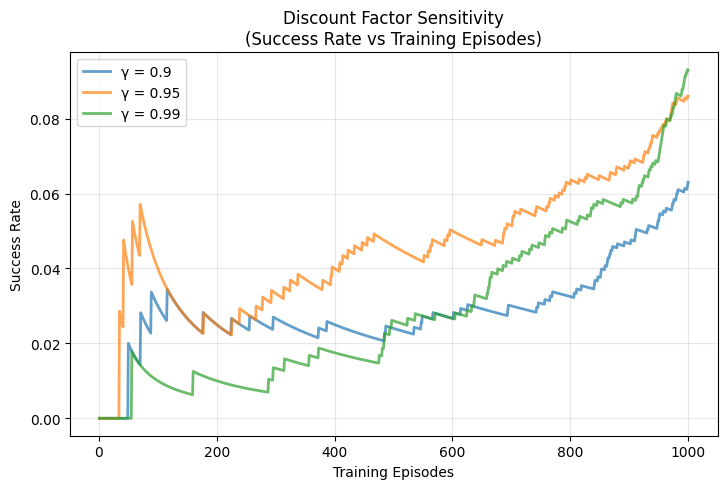


Discount Factor Analysis:
  γ = 0.9: Final Success Rate = 6.30%
  γ = 0.95: Final Success Rate = 8.60%
  γ = 0.99: Final Success Rate = 9.30%


In [24]:


gamma_values = [0.90, 0.95, 0.99] 
results_gamma = {}

for gamma in gamma_values:
    Q_gamma, success_gamma, rewards_gamma = q_learning(
        env, alpha=0.5, gamma=gamma, epsilon_start=1.0, epsilon_min=0.01,
        num_episodes=1000, use_decay=True
    )
    results_gamma[gamma] = {
        'Q': Q_gamma,
        'success_rate': success_gamma,
        'rewards': rewards_gamma
    }

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
episodes = np.arange(1, 1001)
for gamma in gamma_values:
    plt.plot(episodes, results_gamma[gamma]['success_rate'], 
             label=f'γ = {gamma}', alpha=0.7, linewidth=2)
plt.xlabel('Training Episodes')
plt.ylabel('Success Rate')
plt.title('Discount Factor Sensitivity\n(Success Rate vs Training Episodes)')
plt.legend()
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

print("\nDiscount Factor Analysis:")
for gamma in gamma_values:
    final_rate = results_gamma[gamma]['success_rate'][-1]
    print(f"  γ = {gamma}: Final Success Rate = {final_rate*100:.2f}%")

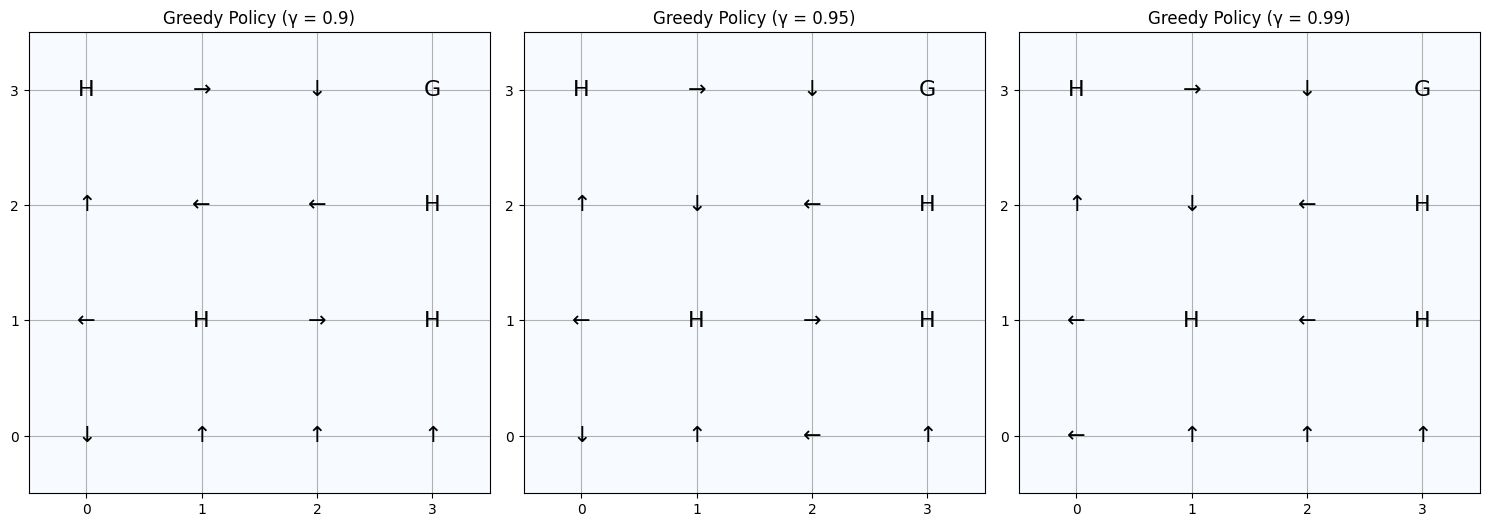

In [25]:


policies_gamma = {}
for gamma in gamma_values:
    policies_gamma[gamma] = compute_greedy_policy(results_gamma[gamma]['Q'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, gamma in enumerate(gamma_values):
    policy = policies_gamma[gamma]
    desc = env.unwrapped.desc.astype(str)
    nrow, ncol = desc.shape
    
    action_arrows = {
        0: "←",  # LEFT
        1: "↓",  # DOWN
        2: "→",  # RIGHT
        3: "↑",  # UP
    }
    
    grid = [["" for _ in range(ncol)] for _ in range(nrow)]
    
    for r in range(nrow):
        for c in range(ncol):
            state = r * ncol + c
            if desc[r, c] == "H":
                grid[r][c] = "H"
            elif desc[r, c] == "G":
                grid[r][c] = "G"
            else:
                grid[r][c] = action_arrows[policy[state]]
    
    ax = axes[idx]
    ax.imshow(np.zeros((nrow, ncol)), cmap='Blues')
    ax.set_xticks(range(ncol))
    ax.set_yticks(range(nrow))
    ax.grid(True)
    ax.set_title(f"Greedy Policy (γ = {gamma})")
    ax.invert_yaxis()
    
    for r in range(nrow):
        for c in range(ncol):
            ax.text(c, r, grid[r][c], ha='center', va='center', fontsize=16)

plt.tight_layout()
plt.show()





In [26]:


def evaluate_policy(env, Q, num_episodes=1000, max_steps=100):

    policy = compute_greedy_policy(Q)
    success_count = 0
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        
        for step in range(max_steps):
            action = policy[state]
            next_state, reward, done, truncated, info = env.step(action)
            
            state = next_state
            
            if done or truncated:
                if reward > 0:  # Success: reached goal
                    success_count += 1
                break
    
    success_rate = success_count / num_episodes
    return success_rate, success_count

print("\nEmpirical Success Probability:")

for gamma in gamma_values:
    success_rate_eval, success_count_eval = evaluate_policy(
        env, results_gamma[gamma]['Q'], num_episodes=1000
    )
    print(f"γ = {gamma}: {success_rate_eval*100:.2f}% ({success_count_eval}/1000 episodes)")

best_alpha = max(alpha_values, key=lambda a: results_alpha[a]['success_rate'][-1])
print(f"\nBest α = {best_alpha} (from learning rate experiment):")
success_rate_eval, success_count_eval = evaluate_policy(
    env, results_alpha[best_alpha]['Q'], num_episodes=1000
)
print(f"  Success Rate: {success_rate_eval*100:.2f}% ({success_count_eval}/1000 episodes)")



Empirical Success Probability:
γ = 0.9: 21.30% (213/1000 episodes)
γ = 0.95: 50.00% (500/1000 episodes)
γ = 0.99: 73.20% (732/1000 episodes)

Best α = 0.1 (from learning rate experiment):
  Success Rate: 72.50% (725/1000 episodes)


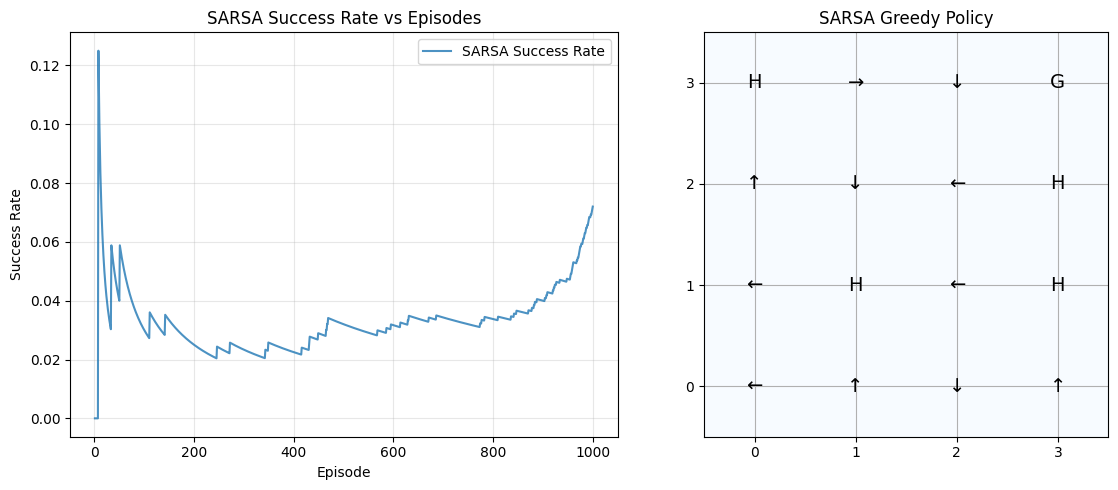

SARSA Stats:
  Final success rate: 7.20%
  Mean reward (last 100 episodes): 0.360
  Final epsilon: 0.010


In [27]:


alpha = 0.5          # learning rate
gamma = 0.95         # discount factor
epsilon_start = 1.0  # initial exploration
epsilon_min = 0.01   # minimum exploration
num_episodes = 1000
max_steps = 100
epsilon_decay = (epsilon_start - epsilon_min) / num_episodes 

def epsilon_greedy_action(Q, state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    return np.argmax(Q[state])

Q_sarsa = np.zeros((n_states, n_actions))
episode_rewards_sarsa = []
success_rate_sarsa = []
success_count = 0
epsilon = epsilon_start

for episode in range(num_episodes):
    state, _ = env.reset()
    action = epsilon_greedy_action(Q_sarsa, state, epsilon)
    total_reward = 0

    for step in range(max_steps):
        next_state, reward, done, truncated, info = env.step(action)
        next_action = epsilon_greedy_action(Q_sarsa, next_state, epsilon)

        Q_sarsa[state, action] = Q_sarsa[state, action] + alpha * (
            reward + gamma * Q_sarsa[next_state, next_action] - Q_sarsa[state, action]
        )

        state, action = next_state, next_action
        total_reward += reward
        if done or truncated:
            break

    episode_rewards_sarsa.append(total_reward)
    if reward > 0:
        success_count += 1
    success_rate_sarsa.append(success_count / (episode + 1))

    epsilon = max(epsilon_min, epsilon - epsilon_decay)

policy_sarsa = np.argmax(Q_sarsa, axis=1)

action_arrows = {0: "←", 1: "↓", 2: "→", 3: "↑"}
desc = env.unwrapped.desc.astype(str)
nrow, ncol = desc.shape
grid = [["" for _ in range(ncol)] for _ in range(nrow)]
for r in range(nrow):
    for c in range(ncol):
        s = r * ncol + c
        if desc[r, c] == "H":
            grid[r][c] = "H"
        elif desc[r, c] == "G":
            grid[r][c] = "G"
        else:
            grid[r][c] = action_arrows[policy_sarsa[s]]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1, num_episodes+1), success_rate_sarsa, label='SARSA Success Rate', alpha=0.8)
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('SARSA Success Rate vs Episodes')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
plt.imshow(np.zeros((nrow, ncol)), cmap='Blues')
plt.xticks(range(ncol))
plt.yticks(range(nrow))
plt.grid(True)
plt.title('SARSA Greedy Policy')
plt.gca().invert_yaxis()
for r in range(nrow):
    for c in range(ncol):
        plt.text(c, r, grid[r][c], ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

print("SARSA Stats:")
print(f"  Final success rate: {success_rate_sarsa[-1]*100:.2f}%")
print(f"  Mean reward (last 100 episodes): {np.mean(episode_rewards_sarsa[-100:]):.3f}")
print(f"  Final epsilon: {epsilon:.3f}")


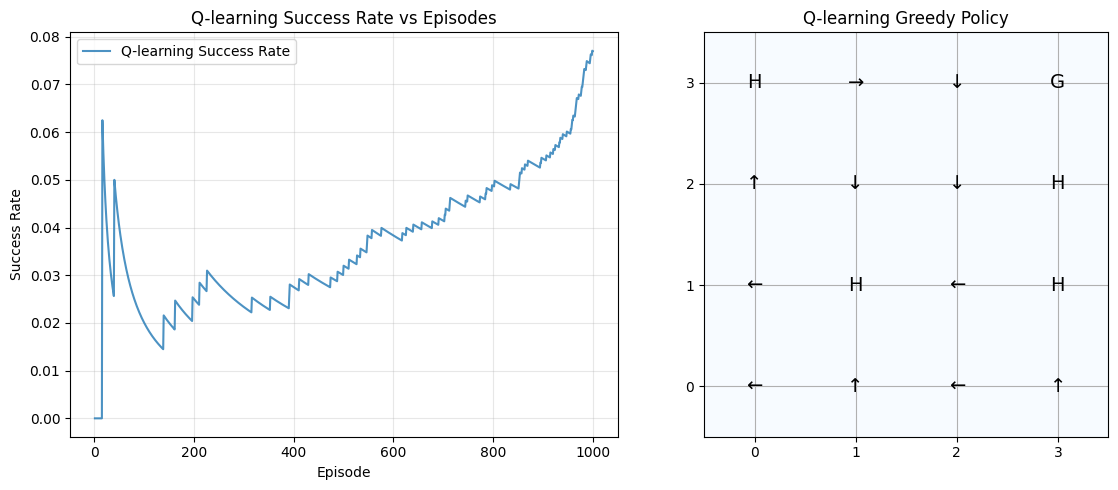

Q-learning Stats:
  Final success rate: 7.70%
  Mean reward (last 100 episodes): 0.280
  Final epsilon: 0.010


In [28]:
alpha = 0.5
gamma = 0.95
epsilon_start = 1.0
epsilon_min = 0.01
num_episodes = 1000
max_steps = 100
epsilon_decay = (epsilon_start - epsilon_min) / num_episodes

def eps_greedy(Q, state, eps):
    if np.random.random() < eps:
        return env.action_space.sample()
    return np.argmax(Q[state])

Q_qlearn = np.zeros((n_states, n_actions))
episode_rewards_q = []
success_rate_q = []
success_count = 0
epsilon = epsilon_start

for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = eps_greedy(Q_qlearn, state, epsilon)
        next_state, reward, done, truncated, info = env.step(action)
        best_next_action = np.argmax(Q_qlearn[next_state])
        Q_qlearn[state, action] = Q_qlearn[state, action] + alpha * (
            reward + gamma * Q_qlearn[next_state, best_next_action] - Q_qlearn[state, action]
        )
        state = next_state
        total_reward += reward
        if done or truncated:
            break

    episode_rewards_q.append(total_reward)
    if reward > 0:
        success_count += 1
    success_rate_q.append(success_count / (episode + 1))
    epsilon = max(epsilon_min, epsilon - epsilon_decay)

policy_q = np.argmax(Q_qlearn, axis=1)
action_arrows = {0: "←", 1: "↓", 2: "→", 3: "↑"}
desc = env.unwrapped.desc.astype(str)
nrow, ncol = desc.shape
grid = [["" for _ in range(ncol)] for _ in range(nrow)]
for r in range(nrow):
    for c in range(ncol):
        s = r * ncol + c
        if desc[r, c] == "H":
            grid[r][c] = "H"
        elif desc[r, c] == "G":
            grid[r][c] = "G"
        else:
            grid[r][c] = action_arrows[policy_q[s]]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1, num_episodes+1), success_rate_q, label='Q-learning Success Rate', alpha=0.8)
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('Q-learning Success Rate vs Episodes')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
plt.imshow(np.zeros((nrow, ncol)), cmap='Blues')
plt.xticks(range(ncol))
plt.yticks(range(nrow))
plt.grid(True)
plt.title('Q-learning Greedy Policy')
plt.gca().invert_yaxis()
for r in range(nrow):
    for c in range(ncol):
        plt.text(c, r, grid[r][c], ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

print("Q-learning Stats:")
print(f"  Final success rate: {success_rate_q[-1]*100:.2f}%")
print(f"  Mean reward (last 100 episodes): {np.mean(episode_rewards_q[-100:]):.3f}")
print(f"  Final epsilon: {epsilon:.3f}")
